In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [2]:
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
df = pd.read_csv(f"{path}/books.csv")

<Axes: >

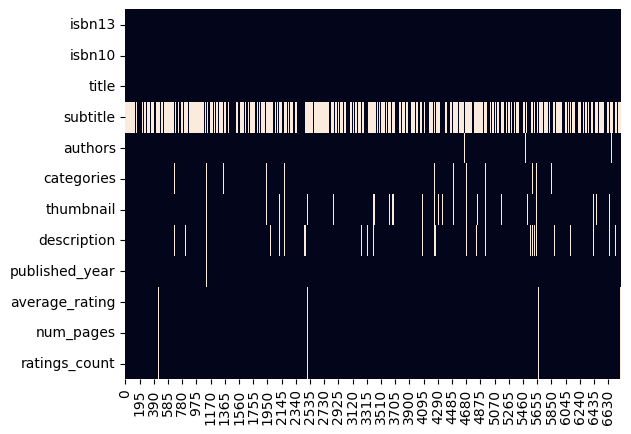

In [3]:
ax=plt.axes()
sns.heatmap(df.isna().transpose(), ax=ax, cbar=False)


In [4]:
import numpy as np

df["missing_description"] = np.where(df["description"].isna(),1,0)
df["age_of_book"] = 2025 - df["published_year"] 

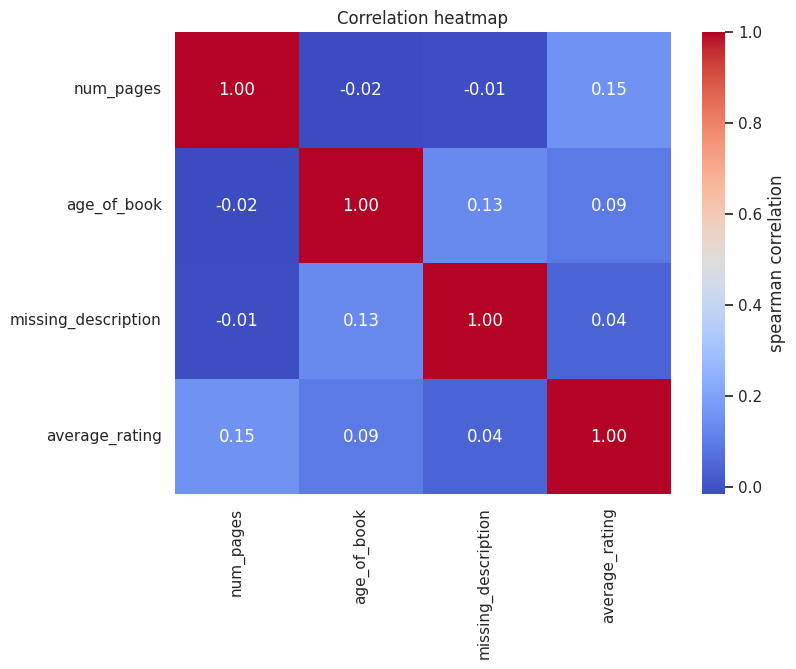

In [5]:
columns_of_interest = ["num_pages","age_of_book","missing_description","average_rating"]

correlation_matrix = df[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True,fmt=".2f",cmap="coolwarm", cbar_kws={"label": "spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [6]:
df[(df["description"].isna() | df["num_pages"].isna() | df["average_rating"].isna() | df["published_year"].isna()) ]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


In [7]:
book_missing = df[(~df["description"].isna() & ~df["num_pages"].isna() & ~df["average_rating"].isna() & ~df["published_year"].isna()) ]

In [8]:
book_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Rock musicians,1
527,"Banks and banking, British",1
528,Brothers and sisters,1
529,Conspiracies,1


In [9]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

/tmp/ipykernel_3000/4057087481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


In [10]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245


In [11]:
book_missing.loc[book_missing["words_in_description"].between(5,14),"description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [12]:
book_missing_25_words = book_missing[book_missing["words_in_description"]>=25]

In [13]:
book_missing_25_words


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [14]:
book_missing_25_words["title_and_subtitle"] = (np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"], book_missing_25_words[["title","subtitle"]].astype(str).agg(": ".join,axis=1)))

/tmp/ipykernel_3000/4023892010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = (np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"], book_missing_25_words[["title","subtitle"]].astype(str).agg(": ".join,axis=1)))


In [15]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [16]:
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)

/tmp/ipykernel_3000/1629903990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)


In [17]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [18]:
book_missing_25_words.drop(["subtitle","missing_description","age_of_book", "words_in_description"],axis=1).to_csv("books_cleaned.csv",index = False)

In [19]:
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma

In [20]:
from dotenv import load_dotenv

load_dotenv()

True

In [21]:
books = pd.read_csv("books_cleaned.csv")
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [22]:
books["tagged_description"].to_csv("tagged_description.txt", index = False, header = False)

In [23]:
raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter( chunk_size = 5839, chunk_overlap = 0, separator = "\n")
documents = text_splitter.split_documents(raw_documents)

In [24]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='"9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, G

In [25]:
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
db_books = Chroma.from_documents(documents, embedding_model)

/tmp/ipykernel_3000/1423163946.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [26]:
query = "A book to unstress"
docs = db_books.similarity_search(query, k=10)
docs

[Document(id='9ad2d151-4de8-4d05-8238-d64b8c6854bd', metadata={'source': 'tagged_description.txt'}, page_content='"9780060554736 Hidden somewhere, in nearly every major city in the world, is an underground seduction lair. And in these lairs, men trade the most devastatingly effective techniques ever invented to charm women. This is not fiction. These men really exist. They live together in houses known as Projects. And Neil Strauss, the bestselling author, spent two years living among them, using the pseudonym Style to protect his real-life identity. The result is one of the most explosive and controversial books of the year -- guaranteed to change the lives of men and transform the way women understand the opposite sex forever. On his journey from AFC (average frustrated chump) to PUA (pick-up artist) to PUG (pick-up guru), Strauss not only shares scores of original seduction techniques but also has unforgettable encounters with the likes of Tom Cruise, Britney Spears, Paris Hilton, H

In [27]:
books[books["isbn13"]==int(docs[0].page_content.split()[0].strip().strip('"'))]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
145,9780060554736,0060554738,The Game,Neil Strauss,Biography & Autobiography,http://books.google.com/books/content?id=ibpvw...,"Hidden somewhere, in nearly every major city i...",2005.0,3.74,464.0,19305.0,The Game: Penetrating the Secret Society of Pi...,"9780060554736 Hidden somewhere, in nearly ever..."


In [28]:
def retrieve_semantic_recommendations(query: str, top_k: int = 10) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k=50)
    
    books_list=[]
    
    for i in range(len(recs)):
        books_list += [int(recs[i].page_content.strip('"').split()[0])]
        
    return books[books["isbn13"].isin(books_list)].head(top_k)

    
    

In [29]:
(retrieve_semantic_recommendations("a book about being mentally unsound"))

/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
51,9780007129652,0007129653,Wilkins' Tooth,Diana Wynne Jones,Business enterprises,http://books.google.com/books/content?id=lXUSH...,"OWN BACK LIMITEDREVENGE ARRANGED, PRICE ACCORD...",2002.0,3.59,207.0,69.0,Wilkins' Tooth,9780007129652 OWN BACK LIMITEDREVENGE ARRANGED...
89,9780060005696,0060005696,The Paradox of Choice,Barry Schwartz,Business & Economics,NaN,The author of The Battle for Human Nature expl...,2005.0,3.84,265.0,23734.0,The Paradox of Choice: Why More Is Less,9780060005696 The author of The Battle for Hum...
104,9780060245603,0060245603,Today I Feel Silly & Other Moods That Make My Day,Jamie Lee Curtis,Juvenile Fiction,http://books.google.com/books/content?id=s_2GI...,Today I feel silly. Mom says it's the heat. I ...,1998.0,4.15,40.0,4030.0,Today I Feel Silly & Other Moods That Make My Day,9780060245603 Today I feel silly. Mom says it'...
133,9780060527990,0060527994,The Devil and Miss Prym,Paulo Coelho,Fiction,http://books.google.com/books/content?id=TpR7J...,"A community devoured by greed, cowardice, and ...",2006.0,3.60,205.0,46113.0,The Devil and Miss Prym: A Novel of Temptation,"9780060527990 A community devoured by greed, c..."
145,9780060554736,0060554738,The Game,Neil Strauss,Biography & Autobiography,http://books.google.com/books/content?id=ibpvw...,"Hidden somewhere, in nearly every major city i...",2005.0,3.74,464.0,19305.0,The Game: Penetrating the Secret Society of Pi...,"9780060554736 Hidden somewhere, in nearly ever..."
252,9780060839789,0060839783,The Professor and the Madman,Simon Winchester,Biography & Autobiography,http://books.google.com/books/content?id=D4Kbl...,"The Professor and the Madman, masterfully rese...",2005.0,3.84,242.0,81384.0,The Professor and the Madman: A Tale of Murder...,"9780060839789 The Professor and the Madman, ma..."
292,9780060925758,0060925752,Soul Mates,Thomas Moore,Psychology,http://books.google.com/books/content?id=7syEl...,This companion volume to Care of the Soul offe...,1994.0,4.00,288.0,4122.0,Soul Mates,9780060925758 This companion volume to Care of...
300,9780060930219,0060930217,V.,Thomas Pynchon,Fiction,http://books.google.com/books/content?id=jqS2p...,"The wild, macabre tale of the twentieth centur...",1999.0,3.96,547.0,1364.0,V.,"9780060930219 The wild, macabre tale of the tw..."
539,9780099771814,0099771810,American Pastoral,Philip Roth,American literature,http://books.google.com/books/content?id=O9E8g...,"In American Pastoral, Philip Roth gives us a n...",1998.0,3.92,432.0,44929.0,American Pastoral,"9780099771814 In American Pastoral, Philip Rot..."
571,9780140144185,0140144188,Journal of a Novel,John Steinbeck,Literary Criticism,http://books.google.com/books/content?id=EYVy6...,Each working day from January 29 to November 1...,1969.0,4.09,182.0,998.0,Journal of a Novel: The East of Eden Letters,9780140144185 Each working day from January 29...


In [30]:
retrieve_semantic_recommendations("book about robin williams")

/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
18,9780006498865,0006498868,The Mad Ship,Robin Hobb,Fantasy fiction,http://books.google.com/books/content?id=2iWez...,Fantasy master Robin Hobb delivers the stunnin...,2000.0,4.24,906.0,36101.0,The Mad Ship,9780006498865 Fantasy master Robin Hobb delive...
89,9780060005696,0060005696,The Paradox of Choice,Barry Schwartz,Business & Economics,NaN,The author of The Battle for Human Nature expl...,2005.0,3.84,265.0,23734.0,The Paradox of Choice: Why More Is Less,9780060005696 The author of The Battle for Hum...
133,9780060527990,0060527994,The Devil and Miss Prym,Paulo Coelho,Fiction,http://books.google.com/books/content?id=TpR7J...,"A community devoured by greed, cowardice, and ...",2006.0,3.60,205.0,46113.0,The Devil and Miss Prym: A Novel of Temptation,"9780060527990 A community devoured by greed, c..."
145,9780060554736,0060554738,The Game,Neil Strauss,Biography & Autobiography,http://books.google.com/books/content?id=ibpvw...,"Hidden somewhere, in nearly every major city i...",2005.0,3.74,464.0,19305.0,The Game: Penetrating the Secret Society of Pi...,"9780060554736 Hidden somewhere, in nearly ever..."
174,9780060593247,0060593245,Every Book Its Reader,Nicholas A. Basbanes,Literary Criticism,http://books.google.com/books/content?id=o4K_K...,Inspired by a landmark exhibition mounted by t...,2006.0,3.96,400.0,300.0,Every Book Its Reader: The Power of the Printe...,9780060593247 Inspired by a landmark exhibitio...
188,9780060652852,0060652853,C.S. Lewis,C. S. Lewis,Religion,http://books.google.com/books/content?id=vtr4N...,Known throughout the world as the intellect be...,1996.0,4.31,176.0,255.0,C.S. Lewis: Readings for Meditation and Reflec...,9780060652852 Known throughout the world as th...
292,9780060925758,0060925752,Soul Mates,Thomas Moore,Psychology,http://books.google.com/books/content?id=7syEl...,This companion volume to Care of the Soul offe...,1994.0,4.00,288.0,4122.0,Soul Mates,9780060925758 This companion volume to Care of...
317,9780060954833,0060954833,African Nights,Kuki Gallmann,Biography & Autobiography,http://books.google.com/books/content?id=MRgkt...,"Lyrical, beautifully written tales of life in ...",2000.0,3.80,336.0,302.0,African Nights: True Stories from the Author o...,"9780060954833 Lyrical, beautifully written tal..."
326,9780060974367,0060974362,The Hidden Hand,Carroll John Daly,Fiction,NaN,Private investigator Race Williams is approach...,1992.0,3.43,272.0,5.0,The Hidden Hand: A Race Williams Mystery,9780060974367 Private investigator Race Willia...
385,9780061150142,0061150142,The Pact,Jodi Picoult,Fiction,http://books.google.com/books/content?id=VDCvq...,Until the phone calls came at three o'clock on...,2006.0,4.01,512.0,237587.0,The Pact: A Love Story,9780061150142 Until the phone calls came at th...


In [31]:
retrieve_semantic_recommendations("A man called Ove")

/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
18,9780006498865,0006498868,The Mad Ship,Robin Hobb,Fantasy fiction,http://books.google.com/books/content?id=2iWez...,Fantasy master Robin Hobb delivers the stunnin...,2000.0,4.24,906.0,36101.0,The Mad Ship,9780006498865 Fantasy master Robin Hobb delive...
39,9780007120697,0007120699,Hercule Poirot's Christmas,Agatha Christie,Christmas stories,http://books.google.com/books/content?id=EA0j4...,"On the night before Christmas, cruel, tyrannic...",2001.0,3.93,335.0,23113.0,Hercule Poirot's Christmas,"9780007120697 On the night before Christmas, c..."
252,9780060839789,0060839783,The Professor and the Madman,Simon Winchester,Biography & Autobiography,http://books.google.com/books/content?id=D4Kbl...,"The Professor and the Madman, masterfully rese...",2005.0,3.84,242.0,81384.0,The Professor and the Madman: A Tale of Murder...,"9780060839789 The Professor and the Madman, ma..."
309,9780060934439,0060934433,In the Footsteps of Mr. Kurtz,Michela Wrong,History,http://books.google.com/books/content?id=etTVm...,"Known as ""the Leopard,"" the president of Zaire...",2002.0,3.98,338.0,2310.0,In the Footsteps of Mr. Kurtz: Living on the B...,"9780060934439 Known as ""the Leopard,"" the pres..."
459,9780099271499,0099271494,Blood and Gold,Anne Rice,Fiction,http://books.google.com/books/content?id=kq8A8...,Here is the gorgeous and sinister story of Mar...,2002.0,3.89,752.0,27476.0,Blood and Gold: The Vampire Marius,9780099271499 Here is the gorgeous and siniste...
521,9780099481249,0099481243,Enduring Love,Ian McEwan,Accidents,http://books.google.com/books/content?id=S702H...,"""The story of how an ordinary man can be drive...",2004.0,3.63,245.0,29552.0,Enduring Love,"9780099481249 ""The story of how an ordinary ma..."
539,9780099771814,0099771810,American Pastoral,Philip Roth,American literature,http://books.google.com/books/content?id=O9E8g...,"In American Pastoral, Philip Roth gives us a n...",1998.0,3.92,432.0,44929.0,American Pastoral,"9780099771814 In American Pastoral, Philip Rot..."
556,9780140055771,0140055770,My Uncle Oswald,Roald Dahl,Fiction,http://books.google.com/books/content?id=O09k1...,Roald Dahl's first-ever novel presents the scu...,1980.0,3.90,208.0,7833.0,My Uncle Oswald,9780140055771 Roald Dahl's first-ever novel pr...
571,9780140144185,0140144188,Journal of a Novel,John Steinbeck,Literary Criticism,http://books.google.com/books/content?id=EYVy6...,Each working day from January 29 to November 1...,1969.0,4.09,182.0,998.0,Journal of a Novel: The East of Eden Letters,9780140144185 Each working day from January 29...
665,9780140441734,0140441735,Rameau's Nephew / D'alembert's Dream,Denis Diderot,Fiction,http://books.google.com/books/content?id=uMbVz...,One of the key figures of the French Enlighten...,1976.0,3.67,237.0,1264.0,Rameau's Nephew / D'alembert's Dream,9780140441734 One of the key figures of the Fr...


In [32]:
retrieve_semantic_recommendations("journal of a novel")

/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
29,9780006551812,0006551815,'Tis,Frank McCourt,Ireland,http://books.google.com/books/content?id=Q3BhQ...,FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #...,2000.0,3.68,495.0,44179.0,'Tis: A Memoir,9780006551812 FROM THE PULIZER PRIZE-WINNING A...
76,9780007204465,0007204469,Tropic of Cancer,Henry Miller,Fiction,http://books.google.com/books/content?id=ProgR...,"Miller's groundbreaking first novel, banned in...",2005.0,3.69,336.0,709.0,Tropic of Cancer,9780007204465 Miller's groundbreaking first no...
174,9780060593247,0060593245,Every Book Its Reader,Nicholas A. Basbanes,Literary Criticism,http://books.google.com/books/content?id=o4K_K...,Inspired by a landmark exhibition mounted by t...,2006.0,3.96,400.0,300.0,Every Book Its Reader: The Power of the Printe...,9780060593247 Inspired by a landmark exhibitio...
300,9780060930219,0060930217,V.,Thomas Pynchon,Fiction,http://books.google.com/books/content?id=jqS2p...,"The wild, macabre tale of the twentieth centur...",1999.0,3.96,547.0,1364.0,V.,"9780060930219 The wild, macabre tale of the tw..."
317,9780060954833,0060954833,African Nights,Kuki Gallmann,Biography & Autobiography,http://books.google.com/books/content?id=MRgkt...,"Lyrical, beautifully written tales of life in ...",2000.0,3.80,336.0,302.0,African Nights: True Stories from the Author o...,"9780060954833 Lyrical, beautifully written tal..."
571,9780140144185,0140144188,Journal of a Novel,John Steinbeck,Literary Criticism,http://books.google.com/books/content?id=EYVy6...,Each working day from January 29 to November 1...,1969.0,4.09,182.0,998.0,Journal of a Novel: The East of Eden Letters,9780140144185 Each working day from January 29...
724,9780141007472,0141007478,Under The Duvet,Marian Keyes,Fiction,http://books.google.com/books/content?id=W9p21...,Setting the record straight about her life as ...,2002.0,3.51,304.0,386.0,Under The Duvet,9780141007472 Setting the record straight abou...
840,9780143034902,0143034901,The Shadow of the Wind,Carlos Ruiz Zafón,Fiction,http://books.google.com/books/content?id=zQJSr...,The international literary sensation--a runawa...,2005.0,4.26,487.0,306069.0,The Shadow of the Wind,9780143034902 The international literary sensa...
857,9780143037484,014303748X,Rounding the Mark,Andrea Camilleri,Fiction,http://books.google.com/books/content?id=1LXaC...,Two seemingly unrelated murders draw Sicilian ...,2006.0,4.06,272.0,2445.0,Rounding the Mark,9780143037484 Two seemingly unrelated murders ...
1079,9780241142462,0241142466,The Best of McSweeney's,Dave Eggers,"Short stories, American",http://books.google.com/books/content?id=TG0sA...,The Best of McSweeney's Volume 2 the second in...,2005.0,3.81,384.0,68.0,The Best of McSweeney's,9780241142462 The Best of McSweeney's Volume 2...


In [33]:
category_mapping={
    'Fiction' : "Fiction",
    'juvenile Fiction' : "Children's fiction",
    'Biography & autobiogtraphy': "Nonfiction",
    'history': "Nonfiction",
    'literary Criticism': "Nonfiction",
    'Philosophy': "Nonfiction",
    'Religion': "Nonfiction",
    'Comics & raphic Novels':"Fiction",
    'Drama': "Fiction",
    'Juvenile Nonfiction': "Children's nonfiction",
    'Science': "Nonfiction",
    'Poetry': "Fiction"
}

In [34]:
books["simple_categories"] = books["categories"].map(category_mapping)

In [35]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [36]:
books[(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
5,9780006380832,0006380832,Empires of the Monsoon,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,Empires of the Monsoon: A History of the India...,9780006380832 Until Vasco da Gama discovered t...,NaN
6,9780006470229,000647022X,The Gap Into Madness,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,The Gap Into Madness: Chaos and Order,9780006470229 A new-cover reissue of the fourt...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,9788171565641,8171565646,Aspects of the Novel,E. M. Forster,English fiction,http://books.google.com/books/content?id=qWU9P...,"Forster's lively, informed originality and wit...",2004.0,3.83,141.0,10.0,Aspects of the Novel,"9788171565641 Forster's lively, informed origi...",NaN
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN


In [37]:
from transformers import pipeline
pipe = pipeline("zero-shot-classification",model="facebook/bart-large-mnli")

Device set to use cuda:0


In [38]:
fiction_categories = ["Fiction", "Nonfiction"]

In [39]:
sequence = books.loc[books["simple_categories"]=="Fiction", "description"].reset_index(drop=True)[0]

In [40]:
def generate_predictions(sequence, categories):
    predictions = pipe(sequence,fiction_categories)
    max_index = np.argmax(pipe(sequence,fiction_categories)["scores"])
    max_label=pipe(sequence,fiction_categories)["labels"][max_index]
    return max_label

In [41]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

for i in tqdm(range(0,300)):
    sequence = books.loc[books["simple_categories"] == "Fiction","description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Fiction"]

100%|██████████| 300/300 [02:05<00:00,  2.38it/s]


In [42]:
predicted_cats

['Fiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Nonfiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Nonfiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Nonfiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Fiction',
 'Nonfiction',
 'Nonfiction',
 'Nonfiction',
 'Fiction',
 'Fiction',
 'Nonfiction',
 'Nonfiction',
 'Nonfiction',
 'Nonfiction',
 'Fiction',
 'Ficti

In [43]:
for i in tqdm(range(0,290)):
    sequence = books.loc[books["simple_categories"] == "Nonfiction","description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Nonfiction"]

100%|██████████| 290/290 [02:33<00:00,  1.89it/s]


In [44]:
predictions_df = pd.DataFrame({"actual_categories": actual_cats, "predicted_categories": predicted_cats})

In [45]:
predictions_df["correct_prediction"] = np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)

In [46]:
predictions_df["correct_prediction"].sum() / len(predictions_df)

np.float64(0.8186440677966101)

In [47]:
isbns = []
predicted_cats = []

missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13","description"]].reset_index(drop=True)

In [48]:
for i in tqdm(range(len(missing_cats))):
    sequence = missing_cats["description"][i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    isbns += [missing_cats["isbn13"][i]]

100%|██████████| 2602/2602 [3:56:58<00:00,  5.46s/it]      


In [49]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns,"predicted_categories": predicted_cats})

In [50]:
print(missing_predicted_df.columns.tolist())

['isbn13', 'predicted_categories']


In [51]:
books = pd.merge(books,missing_predicted_df, on ="isbn13", how="left")


In [52]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories,predicted_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,NaN
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,NaN
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN,Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN,Nonfiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,NaN


In [53]:
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [54]:
books.to_csv("books_with_categories.csv", index= False)

In [55]:
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base",  return_all_scores=True)
classifier("I love this!")

Device set to use cuda:0
/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


[[{'label': 'anger', 'score': 0.004419783595949411},
  {'label': 'disgust', 'score': 0.001611993182450533},
  {'label': 'fear', 'score': 0.00041385157965123653},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764594301581383},
  {'label': 'sadness', 'score': 0.002092392183840275},
  {'label': 'surprise', 'score': 0.008528673090040684}]]

In [56]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [57]:
classifier(books["description"][0])

[[{'label': 'anger', 'score': 0.003935152664780617},
  {'label': 'disgust', 'score': 0.019100716337561607},
  {'label': 'fear', 'score': 0.654841423034668},
  {'label': 'joy', 'score': 0.0151612414047122},
  {'label': 'neutral', 'score': 0.16985194385051727},
  {'label': 'sadness', 'score': 0.11640876531600952},
  {'label': 'surprise', 'score': 0.02070068195462227}]]

In [58]:
predictions = classifier(books["description"][0].split("."))

In [59]:
sorted(predictions[0], key = lambda x: x["score"], reverse=True)

[{'label': 'surprise', 'score': 0.7296032905578613},
 {'label': 'neutral', 'score': 0.14038528501987457},
 {'label': 'fear', 'score': 0.06816212832927704},
 {'label': 'joy', 'score': 0.04794234782457352},
 {'label': 'anger', 'score': 0.00915635097771883},
 {'label': 'disgust', 'score': 0.002628469606861472},
 {'label': 'sadness', 'score': 0.002122158883139491}]

In [64]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:  # prediction is a list of dicts
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [65]:
for i in range(10):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

In [66]:
emotion_scores

{'anger': [np.float64(0.06413363665342331),
  np.float64(0.6126189827919006),
  np.float64(0.06413363665342331),
  np.float64(0.3514835834503174),
  np.float64(0.08141224086284637),
  np.float64(0.232224702835083),
  np.float64(0.5381836295127869),
  np.float64(0.06413363665342331),
  np.float64(0.3006698787212372),
  np.float64(0.06413363665342331)],
 'disgust': [np.float64(0.27359163761138916),
  np.float64(0.3482847511768341),
  np.float64(0.10400667041540146),
  np.float64(0.15072251856327057),
  np.float64(0.18449507653713226),
  np.float64(0.7271749377250671),
  np.float64(0.15585501492023468),
  np.float64(0.10400667041540146),
  np.float64(0.2794811427593231),
  np.float64(0.1779269576072693)],
 'fear': [np.float64(0.928167998790741),
  np.float64(0.9425276517868042),
  np.float64(0.9723208546638489),
  np.float64(0.3607066869735718),
  np.float64(0.09504348784685135),
  np.float64(0.051362816244363785),
  np.float64(0.7474286556243896),
  np.float64(0.4044956862926483),
  np.f

In [67]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

  0%|          | 0/5197 [00:00<?, ?it/s]/home/ihabmohammed/miniforge3/envs/bkrc/lib/python3.13/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
100%|██████████| 5197/5197 [01:46<00:00, 48.95it/s] 


In [68]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [69]:
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273592,0.928168,0.932797,0.646216,0.967157,0.729603,9780002005883
1,0.612619,0.348285,0.942528,0.704420,0.887940,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351484,0.150723,0.360707,0.251881,0.732686,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475880,0.078766,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148209,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759456,0.951104,0.368111,0.078766,9788185300535


In [70]:
books = pd.merge(books, emotions_df, on = "isbn13")

In [71]:
books.to_csv("books_with_emotions.csv", index = False)